# Regresja liniowa

Regresja to proces nadzorowanego uczenia maszynowego, podobny do klasyfikacji, jednak polegający na prognozowaniu ciągłych wartości, a nie etykiet.
Jeżeli celem analizy jest prognozowanie liczb, należy stosować regresję.

Jak się okazuje, wiele modeli klasyfikacyjnych udostępnianych przez bibliotekę sklearn można wykorzystywać do rozwiązywania problemów regresyjnych. Udostępniany jest ten sam interfejs API składający się z metod fit, score i predict. Tak samo jest w przypadku wzmacniających bibliotek nowej generacji XGBoost i LightGBM.

Jakość modeli regresyjnych, pomimo ich podobieństw do modeli klasyfikacyjnych i hiperparametrów, ocenia się z użyciem innych wskaźników.

Regresyjny model odniesienia stanowi bazę, z którą porównywane są inne modele. Domyślnym wynikiem metody score z biblioteki sklearn jest współczynnik determinacji (oznaczany jako r2 lub R2). Jest to stopień, w jakim zmienność danych wejściowych przekłada się na zmienność prognozowanych wyników. Zazwyczaj współczynnik ten przyjmuje wartości z przedziału od 0 do 1, choć w przypadku szczególnie złych modeli może być liczbą ujemną.

## Wprowadzenie

Zdefiniujmy:
- $X_1, X_2, ..., X_n$ - zmienne niezależne (nasze dane do modelu)
- $Y$ - zmienna docelowa
- $y_{true}$ - wartość rzeczywista
- $y_{pred}$ - wartość przewidziana przez model
- $w_0, w_1,...,w_n$ - wagi do modelu (podlegaja uczeniu)

W tym modelu zakłada się. ze wartość przewidywana $y_{pred}$ może być liniową kombinacją zmiennych niezależnych. Ogólna postac modelu:

>  $$y_{pred}(W, X) = w_0 + w_1X_1 + ... + w_nX_n$$
>  $$Y = XW$$

gdzie:
>  $X = \begin{pmatrix} 1 & X_1 & X_2 & \dots & X_n\end{pmatrix}$,  $W = \begin{pmatrix} w_{0} \\  w_{1}  \\ \dots \\ w_{n}\end{pmatrix}$

Wprowadźmy oznaczenia:
- $w = (w_1,...w_n)$ jako `coef_`
- $w_0$ jako `intercept_`

Regresja Liniowa polega na takim dopasowaniu wag $w_0, w_1,...,w_n$ by zminimalizować funkcję kosztu(cost function):
>$$||XW-Y||_{2}^{2} \rightarrow min$$  

Przykład w $R^2$:  
$Y=w_0 + w_1X_1$

Przykład w $R^3$:  
$Y=w_0 + w_1X_1 + w_2X_2$




**Podstawowe założenia regresji liniowej**

* mamy zależność liniową
* wariancja reszt jest taka sama dla wszystkich obserwacji
* brak współliniowości (żaden z predyktorów nie stanowi kombinacji liniowej innych predyktorów)

## Przykładowe dane
### Wygenerowanie danych

Przykład w $R^2$:  
$Y=w_0 + w_1X_1$

In [1]:
import numpy as np
np.random.seed(10)

X = np.arange(0, 50, 0.5)
noise = 10 * np.random.randn(100)
y = 2 * X + 100 + noise
X = X.reshape(-1, 1)

print('Rozmiar X:',X.shape)
print('Rozmiar y:', y.shape)

Rozmiar X: (100, 1)
Rozmiar y: (100,)


### Podział danych na zbiór treningowy i testowy

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Wizualizacja

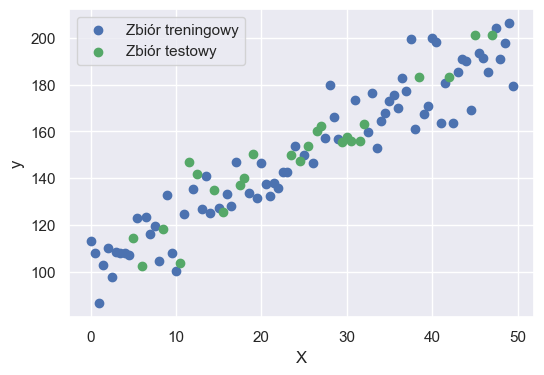

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, c='b', label='Zbiór treningowy')
plt.scatter(X_test, y_test, c='g', label='Zbiór testowy')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

## Regresja liniowa - model

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(lin_reg.coef_)
print(lin_reg.intercept_)

[1.93438329]
101.86187237393074


Rozwiązaniem jest prosta o postaci:
$Y=101.86 + 1.93\cdot X_1$   

### Wizualizacja zbioru treningowego i dopasowanego modelu

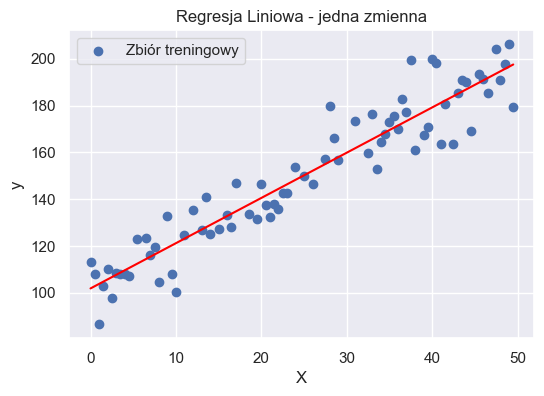

In [5]:
plt.figure(figsize=(6, 4))
plt.title('Regresja Liniowa - jedna zmienna')
plt.scatter(X_train, y_train, c='b', label='Zbiór treningowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

###  Wizualizacja zbioru testowego i dopasowanego modelu

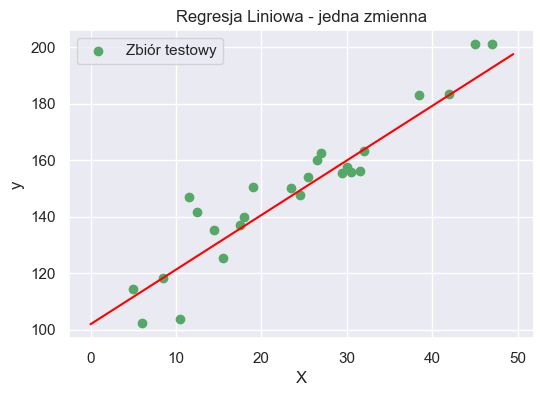

In [6]:
y_pred = lin_reg.predict(X_test)
plt.figure(figsize=(6, 4))
plt.title('Regresja Liniowa - jedna zmienna')
plt.scatter(X_test, y_test, c='g', label='Zbiór testowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

###  Ocena modelu
Metoda `score()` zwraca współczynnik determinacji $R^2$  naszej predykcji.

Współczynnik determinacji jest zdefiniowany jako:

$R^{2} =1 - \frac{\sum_{t=1}^{n}(y_{pred, t} - \bar{y}_{true} )^2}{\sum_{t=1}^{n}(y_{true, t} - \bar{y}_{true} )^2}$

Współczynnik determinacji jest miarą stopnia dopasowania modelu do próby. Dopasowanie modelu jest tym lepsze im wartość $R^2$ jest bliżej 1.

In [7]:
lin_reg.score(X_test, y_test)

0.8773651467468433

In [8]:
lin_reg.score?

## Przykład złego zastosowania regresji liniowej

[-0.97674702]
22.30309977402894


Text(0, 0.5, 'y')

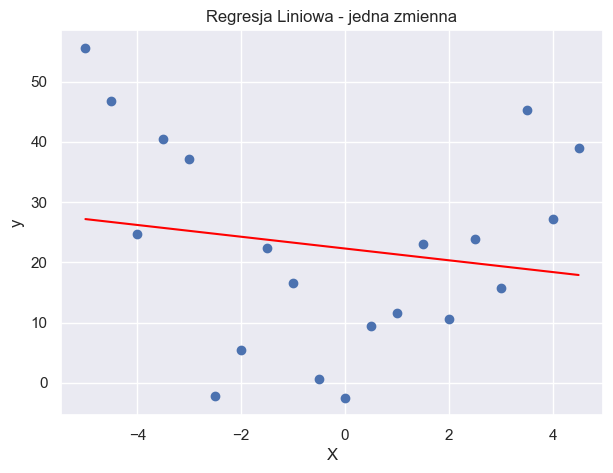

In [9]:
X = np.arange(-5, 5, 0.5)
noise = 10 * np.random.randn(20)
y = 2 * (X ** 2) + 4 + noise
X = X.reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(lin_reg.coef_)
print(lin_reg.intercept_)

plt.figure(figsize=(7, 5))
plt.title('Regresja Liniowa - jedna zmienna')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X, c='red')
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')

# Regresja Wielomianowa - Polynomial Regression

Powszechnym wzorcem stosowanym w uczeniu maszynowym jest użycie modeli liniowych wytrenowanych na nieliniowych funkcjach danych. Podejscie to utrzymuje szybkie działanie metod liniowych i zarazem umożliwia stosowanie metod liniowych dla znacznie szerszego zakresu danych.

Przykładowo, prosta regresja liniowa może zostać zastosowana przez skonstruowanie cech wielomianowych do modelów nieliniowych.

Rozważmy model regresji liniowej:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$$

Dodając cechy wielomianowe otrzymujemy:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$

Wyobraźmy sobie teraz następujące podstawienie:

$$z = [1, x_1, x_2, x_1 x_2, x_1^2, x_2^2]$$

Wrzucając to z powrotem do naszego modelu dotrzymujemy prosty model liniowy:

$$\hat{y}(w, z) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

To implikuje fakt, iż nasz model regresji wielomianowej znajduje się w klasie modeli liniowych i może być rozwiązany za pomocą tych samych technik. 

Rozważmy model regresji liniowej: 

$$\hat{y}(w,x)=w_0+w_1x_1$$

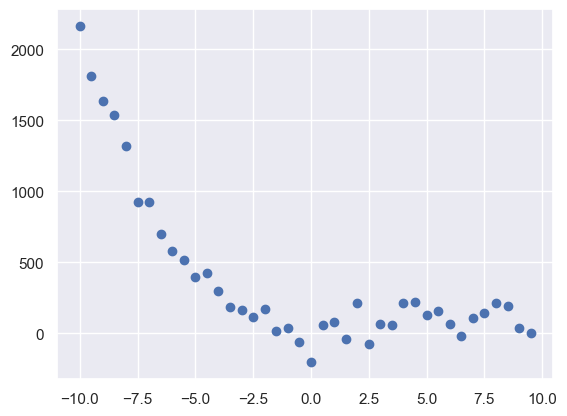

In [10]:
np.random.seed(0)
X = np.arange(-10, 10, 0.5)
noise = 80 * np.random.randn(40)
y = -X**3 + 10*X**2 - 2*X + 3 + noise
X = X.reshape(40, 1)
_ = plt.scatter(X, y)

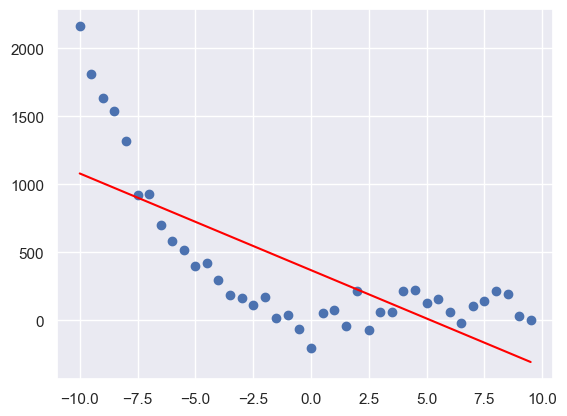

In [11]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

plt.scatter(X, y)
_ = plt.plot(X, y_pred, c='red')

In [12]:
from sklearn.metrics import r2_score

r2_score(y, y_pred)

0.5398062344255776

Model jest niedouczony (underfitting). Potrzebujemy zwiekszyć złozoność modelu do naszego problemu.

## Ekstrakcja cech wielomianowych - stopień 2

Rozważmy model regresji liniowej:
    
$$\hat{y}(w, x) = w_0 + w_1 x_1$$

Dodając cechy wielomianowe otrzymujemy:
    
$$\hat{y}(w, x) = w_0 + w_1 x_1 +w_2x_1^2 $$

Wyobraźmy sobie teraz nastepujące podstawienie:
    
$$z = [1, x_1, x_1^2]$$

Wrzucając to z powrotem do naszego modelu otrzymujemy prosty model liniowy:
    
$$\hat{y}(w, z) = w_0 + w_1 z_1 + w_2 z_2$$

**PolynomialFeatures**

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

Generacja cech wielomianowych.
Wygeneruj nową macierz cech składającą się ze wszystkich kombinacji wielomianów cech o stopniu mniejszym lub równym określonemu stopniowi. 

Na przykład, jeśli próbka wejściowa jest dwuwymiarowa i ma postać $[a, b]$, cechy wielomianu stopnia 2 to $[1, a, b, a^2, ab, b^2]$.

Jeśli próbka jest jednowymiarowa $[a]$, cechy wielomianu stopnia 2 to $[1,a,a^2]$

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_poly[0:5]

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ]])

###  Dopasowanie modelu

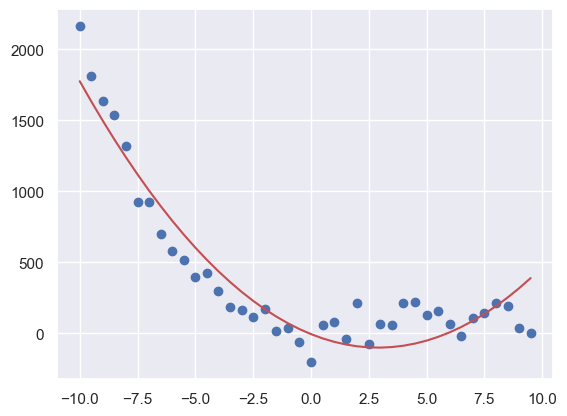

In [14]:
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)

y_pred = regressor_poly.predict(X_poly)

plt.scatter(X, y)
_ = plt.plot(X, y_pred, c='r')

In [15]:
r2_score(y, y_pred)

0.9000601519884677

## Ekstrakcja cech wielomianowych - stopień 3

In [16]:
np.set_printoptions(suppress=True)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
X_poly[0:5]

array([[    1.   ,   -10.   ,   100.   , -1000.   ],
       [    1.   ,    -9.5  ,    90.25 ,  -857.375],
       [    1.   ,    -9.   ,    81.   ,  -729.   ],
       [    1.   ,    -8.5  ,    72.25 ,  -614.125],
       [    1.   ,    -8.   ,    64.   ,  -512.   ]])

###  Dopasowanie modelu

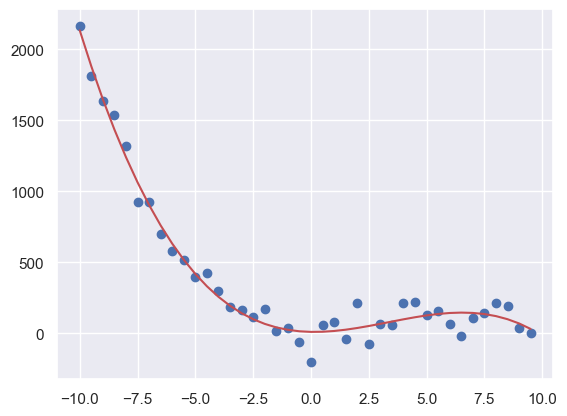

In [17]:
regressor_poly_3 = LinearRegression()
regressor_poly_3.fit(X_poly, y)

y_pred = regressor_poly_3.predict(X_poly)

plt.scatter(X, y)
_ = plt.plot(X, y_pred, c='r')

In [18]:
r2_score(y, y_pred)

0.9793138557357745

# Inne metody regresji - przykłady

In [19]:
from sklearn import (
    model_selection,
    preprocessing,
)

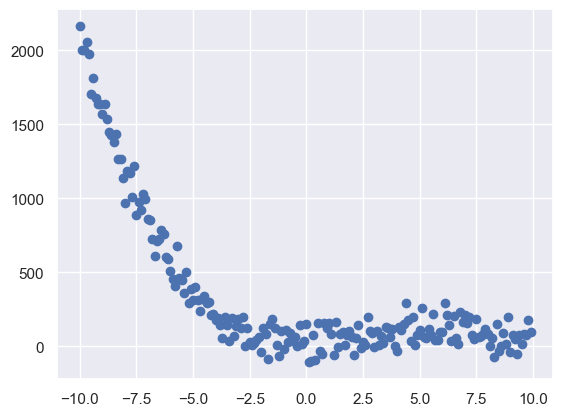

In [20]:
cof = 5
np.random.seed(0)
X = np.arange(-10, 10, 0.5/cof)
noise = 80 * np.random.randn(40*cof)
y = -X**3 + 10*X**2 - 2*X + 3 + noise
X = X.reshape(40*cof, 1)
_ = plt.scatter(X, y)

In [21]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
)

## Regresja liniowa

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
[lr.score(X_test, y_test),lr.coef_]

[0.45167010522762296, array([-65.08392859])]

## Support Vector Machines

In [23]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
svr.score(X_test, y_test) #R^2

0.025568867373555126

In [24]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
[svr.score(X_test, y_test),svr.coef_]

[0.3773062700453593, array([[-31.59206963]])]

In [25]:
from sklearn.svm import SVR
svr = SVR(kernel='poly')
svr.fit(X_train, y_train)
svr.score(X_test, y_test) #R^2

0.25104741853457657

## KNN

In [26]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
knr.score(X_test, y_test) #R^2

0.9737682009657153

 ## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
dtr.score(X_test, y_test) #R^2

0.9417359799638221

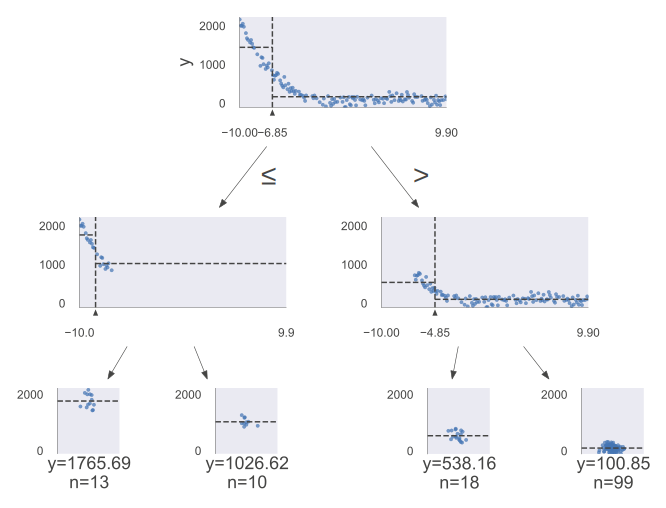

In [28]:
# pip install dtreeviz
# https://github.com/parrt/dtreeviz/blob/master/notebooks/dtreeviz_sklearn_visualisations.ipynb
import dtreeviz.trees
dtr3 = DecisionTreeRegressor(max_depth=2)
dtr3.fit(X_train, y_train)
viz_model = dtreeviz.model(
    dtr3,
    X_train=X_train,
    y_train=y_train,
    target_name="y"
)
viz_model.view(scale=2)

In [29]:
import pydotplus
from io import StringIO
from sklearn.tree import export_graphviz
dot_data = StringIO()
export_graphviz(
    dtr,
    out_file=dot_data,
    feature_names=['X'], # X.columns,
    filled=True,
)
g = pydotplus.graph_from_dot_data(
    dot_data.getvalue()
)
g.write_png("tree.png");

## Random Forest

In [31]:
from sklearn.ensemble import (
    RandomForestRegressor,
)
rfr = RandomForestRegressor(
    random_state=42, n_estimators=100
)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test) #R^2

0.9597158970285286

## XGBoost (eXtreme Gradient Boosting)

In [32]:
import xgboost as xgb
xgr = xgb.XGBRegressor(random_state=42, )
xgr.fit(X_train, y_train)
xgr.score(X_test, y_test) #R^2

0.9454065882623204

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

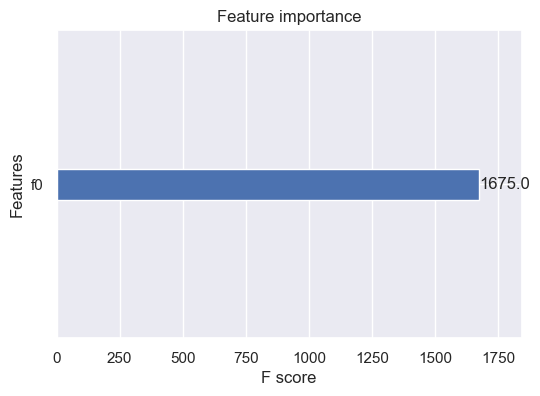

In [34]:
fig, ax = plt.subplots(figsize=(6, 4))
xgb.plot_importance(xgr, ax=ax) # tu tylko jedna cecha :)

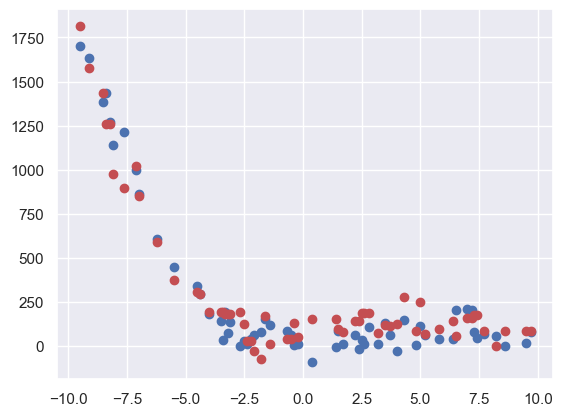

In [44]:
y_pred = xgr.predict(X_test)

plt.scatter(X_test, y_test)
_ = plt.scatter(X_test, y_pred, c='r')

## Ocena modelu

In [46]:
predictions = xgr.predict(X_test)

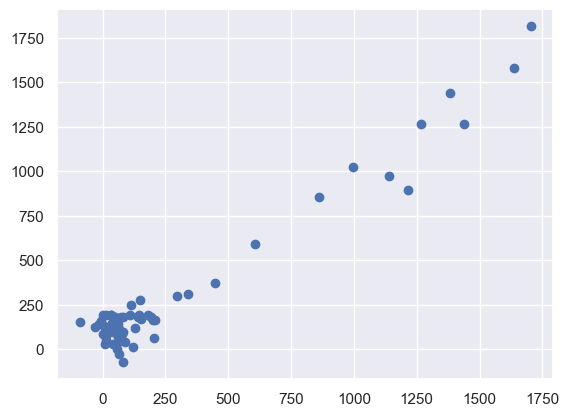

In [47]:
plt.scatter(y_test,predictions)

**Resztkowy histogram**

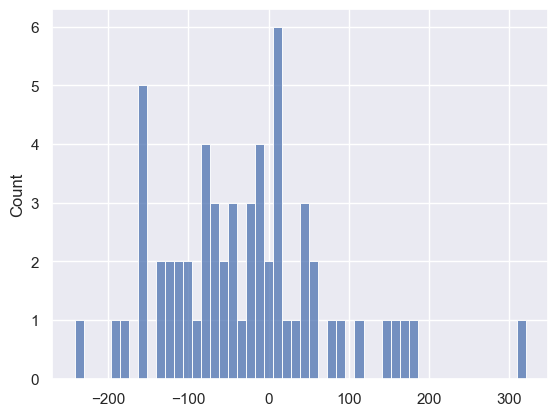

In [48]:
sns.histplot((y_test-predictions),bins=50);

## Metryki oceny regresji

Oto trzy typowe metryki oceny problemów z regresją:

**Średni błąd bezwzględny** (MAE) to średnia wartości bezwzględnej błędów:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Średni błąd kwadratowy** (MSE) to średnia kwadratów błędów:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Pierwiastek ze średniego błądu kwadratowego** (RMSE) to pierwiastek kwadratowy średniej kwadratów błędów:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Porównując te dane:

- **MAE** jest najłatwiejszy do zrozumienia, ponieważ jest to średni błąd.
- **MSE** jest bardziej popularne niż MAE, ponieważ MSE „karze” większe błędy, co zwykle jest przydatne w prawdziwym świecie.
- **RMSE** jest jeszcze bardziej popularny niż MSE, ponieważ RMSE można interpretować w jednostkach „y”.

Wszystkie te funkcje są **funkcjami strat**, ponieważ chcemy je zminimalizować.

In [49]:
from sklearn import metrics

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82.66316613339265
MSE: 11212.694287078339
RMSE: 105.89001032712358


In [51]:
xgr.score(X_test, y_test)

0.9454065882623204

## Regresja logistyczna

Jedną z najpopularniejszych odmian analizy regresji jest regresja logistyczna. Najważniejszą cechą regresji logistycznej jest to, że zmienna zależna (wyjaśniana, przewidywana) jest zmienną dychotomiczną, czyli przyjmuje dwie wartości, najczęściej 0 i 1. 

Jest to zatem klasyfikacja, nie zaś "regresja" rozumiana jako szacowanie wartości :)

W klasycznej analizy regresji - model liniowy analizowaliśmy zależność pomiędzy dwiema zmiennymi mierzonymi na skali ilościowej. Zastosowanie modelu liniowego dla zmiennej zależnej mierzonej na skali dychotomicznej dałoby błędną interpretację, ponieważ model taki zakłada występowanie wartości poniżej 0 lub powyżej 1, a w przypadku zmiennej dychotomicznej nie mamy takich przypadków, coś może wystąpić bądź nie. 

Dlatego też zastosowanie klasycznej regresji liniowej dla zmiennych dychotomicznych jest nieodpowiednim podejściem analitycznym.

Więcej, np.: https://asystaekspercka.pl/regresja-logistyczna.html

# Bibliografia

* Matt Harrison, Uczenie maszynowe w Pythonie (Leksykon kieszonkowy), Helion
* Materiały internetowe, kursy i szkolenia

Warto zajrzeć: https://machinelearningmastery.com/calculate-feature-importance-with-python/ 

oraz portal Kaggle